# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 5</center>

# <center>Feature Engineering</center>

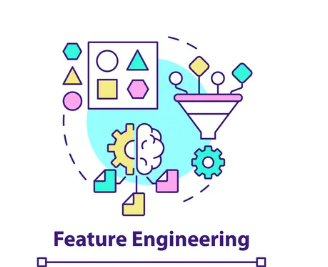

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Imputing Numerical Features </li>
<li> Detecting Outlier</li>
<li> Feature Transformation</li>
<li> Feature Scaling </li>
<li> Working with Categorical Features </li>
<li> Combine Features</li>
</ol>

## 0. Learning Objectives

Implement Numerical feature engineering techniques such as outlier detection, feature transformation, and feature scaling.

By the end of the lab, you should be able to :
- Apply required feature engineering techniques to given dataset.


- Prepare features for traning machine learning model.

# 1. Imputing Numerical  Features using sklearn

Instructions:

- Load data from loan_train.csv file. Create a dataframe names `ndf` which contains only numerical features. Default datatype of `Dependents` feature is `object`. Do you think it should be numerical feature? Justify your answer.


- Use sklearn SimpleImputer to Impute the missing values using most suitable strategy.



In [18]:
# Write your solution here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("loan_train.csv")
ndf = df.select_dtypes(include=["int64","float64"])
ndf


ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
..              ...  
609             1.0  
610             1.0  
611             1.0  
612             1.0  
613             0.0  

[614 rows x 5 columns]

In [24]:
from sklearn.impute import SimpleImputer 

imputeC = SimpleImputer(strategy = 'mean')
data = imputeC.fit_transform(ndf) #numpy array =data 
cdf = pd.DataFrame(data, columns = ndf.columns)
cdf.isna().sum() 

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

# 2. Outlier Detection

Instructions:

- Choose any one numerical feature and check if there is any outliers.


- Use both inter quartile range method and standard deviation method to remove outliers in the dataset.

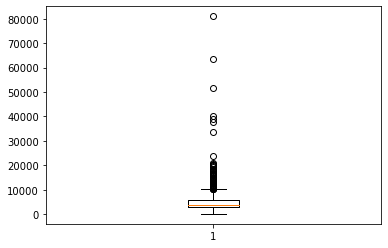

In [28]:
#Write your solution here
#Check outlier

x = cdf["ApplicantIncome"]
plt.boxplot(x)
plt.show()


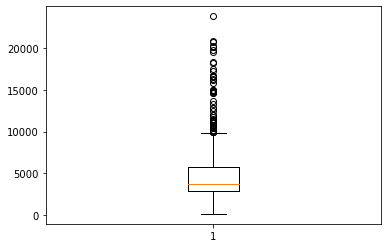

In [45]:
#using inter quartile range method
Q1 = ndf.ApplicantIncome.quantile(0.25)
Q3 = ndf.ApplicantIncome.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)
df1 = ndf[(ndf.ApplicantIncome > lowerlimit) & (ndf.ApplicantIncome < upperlimit)]
df1.shape
x = cdf["ApplicantIncome"]
plt.boxplot(x)
plt.show()

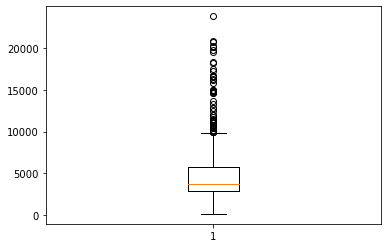

In [44]:
#using Drop method
df = cdf.loc[cdf.ApplicantIncome > 30000]
r = df.index
len(r)
cdf.drop(r, inplace =True)
cdf.shape
x = cdf["ApplicantIncome"]
plt.boxplot(x)
plt.show()

C:\Users\Lab-1\AppData\Local\Temp\ipykernel_7192\1722902768.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = cdf[(cdf.ApplicantIncome>lowerlimit) & (df.ApplicantIncome<upperlimit)]


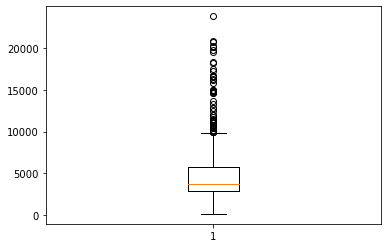

In [52]:
#Usign standard deviation method
std = cdf.ApplicantIncome.std()
mean = cdf.ApplicantIncome.mean()
upperlimit = mean + (3 * std)
lowerlimit = mean - (3 * std)
df2 = cdf[(cdf.ApplicantIncome>lowerlimit) & (df.ApplicantIncome<upperlimit)]
df2.shape

x = cdf["ApplicantIncome"]
plt.boxplot(x)
plt.show()

## 3. Feature Transformation

Instructions:

- Use an appropriate graph to explore the distribution of each numeric feature. 



- Choose any one feature that needs to apply feature transformation. Apply each feature transformation technique and justify which feature transformation technique is suitable for the chosen feature.

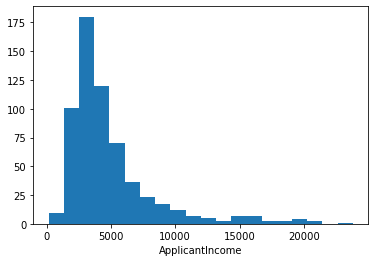

In [61]:
# Write your solution here

plt.hist(cdf.ApplicantIncome, bins =20)
plt.xlabel("ApplicantIncome")
plt.show()



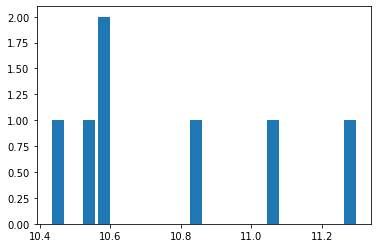

In [63]:
#logarithm transformation
x = np.log(df['ApplicantIncome'])
plt.hist(x, bins=20, rwidth=0.8)
plt.show()

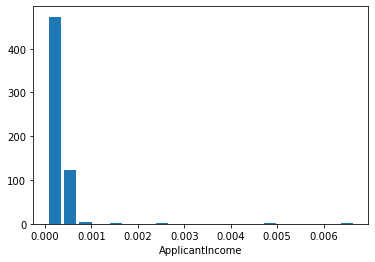

In [64]:
#reciprocal transformation

x = np.reciprocal(cdf.ApplicantIncome)
plt.hist(x, bins =20, rwidth=0.8)
plt.xlabel("ApplicantIncome")
plt.show()

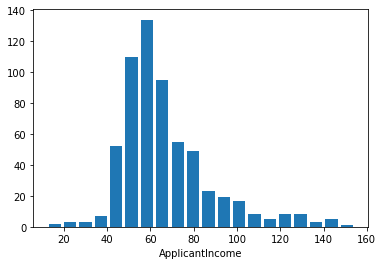

In [65]:
#sqaure root transformation

x = np.sqrt(cdf.ApplicantIncome)
plt.hist(x, bins =20, rwidth=0.8)
plt.xlabel("ApplicantIncome")
plt.show()

In [75]:
cdf.shape

(607, 5)

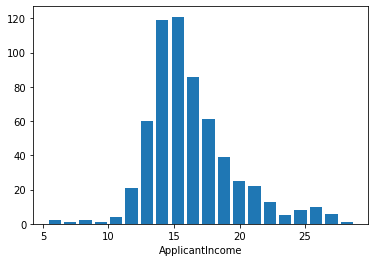

In [78]:
#Cube root transformation
x = np.cbrt(cdf.ApplicantIncome)
plt.hist(x, bins =20, rwidth=0.8)
plt.xlabel("ApplicantIncome")
plt.show()

#Cube root transformation is suitable for this given dataset since the distribution of the dataset is all normal 

ValueError: supplied range of [1.3937095806663797e+65, inf] is not finite

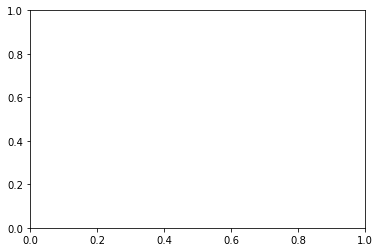

In [77]:
#Exponential transformation
x = np.exp(cdf.ApplicantIncome)
plt.hist(x, bins =20, rwidth=0.8)
plt.xlabel("ApplicantIncome")
plt.show()

#Exponential Transformation is not suitable for larger values and is not recommended.
# number power to the number

## 4. Feature Scaling

Instructions:


- Use all feature scaling techniques to scale all the numerical features in the given datasets and observe the difference in the scaled features when you use different scaling techniques.


In [102]:
# Write your solution here
#using Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
numeric = scaler.fit_transform(cdf)
minmaxdf = pd.DataFrame(numeric, columns = cdf.columns)
minmaxdf

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.240942           0.000000    0.214372          0.743590   
1           0.187418           0.036192    0.185647          0.743590   
2           0.120492           0.000000    0.088924          0.743590   
3           0.102862           0.056592    0.173167          0.743590   
4           0.247326           0.000000    0.205928          0.743590   
..               ...                ...         ...               ...   
602         0.116264           0.000000    0.096724          0.743590   
603         0.167252           0.000000    0.048362          0.358974   
604         0.334926           0.005760    0.380655          0.743590   
605         0.314252           0.000000    0.277691          0.743590   
606         0.187418           0.000000    0.193448          0.743590   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
..              ...  
602             1.0  
603             1.0  
604             1.0  
605             1.0  
606             0.0  

[607 rows x 5 columns]

In [100]:
#using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric = scaler.fit_transform(cdf)
Standarddf = pd.DataFrame(numeric, columns = cdf.columns)
Standarddf

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.275054          -0.556374    0.035277          0.273781   
1          -0.089733          -0.042310   -0.202646          0.273781   
2          -0.545860          -0.556374   -1.003816          0.273781   
3          -0.666015           0.247447   -0.306023          0.273781   
4           0.318563          -0.556374   -0.034659          0.273781   
..               ...                ...         ...               ...   
602        -0.574674          -0.556374   -0.939205          0.273781   
603        -0.227176          -0.556374   -1.339790         -2.539739   
604         0.915591          -0.474560    1.412615          0.273781   
605         0.774690          -0.556374    0.559757          0.273781   
606        -0.089733          -0.556374   -0.138036          0.273781   

     Credit_History  
0          0.449516  
1          0.449516  
2          0.449516  
3          0.449516  
4          0.449516  
..              ...  
602        0.449516  
603        0.449516  
604        0.449516  
605        0.449516  
606       -2.425982  

[607 rows x 5 columns]

In [101]:
#using Robust scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
numeric = scaler.fit_transform(cdf)
robustdf = pd.DataFrame(numeric, columns = cdf.columns)
robustdf

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.737065          -0.533420    0.296970               0.0   
1           0.289952           0.121094    0.000000               0.0   
2          -0.269115          -0.533420   -1.000000               0.0   
3          -0.416387           0.490017   -0.129032               0.0   
4           0.790394          -0.533420    0.209677               0.0   
..               ...                ...         ...               ...   
602        -0.304432          -0.533420   -0.919355               0.0   
603         0.121490          -0.533420   -1.419355            -180.0   
604         1.522161          -0.429253    2.016129               0.0   
605         1.349461          -0.533420    0.951613               0.0   
606         0.289952          -0.533420    0.080645               0.0   

     Credit_History  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
..              ...  
602             0.0  
603             0.0  
604             0.0  
605             0.0  
606            -1.0  

[607 rows x 5 columns]

## 5. Categorical features


Instructions:


- Get all your categorical data in a new dataframe `cdf`. Refer your last class work on feature engineering on categorical features to make your categorical features ready for tranning machine learning model.

In [143]:
# Write your solution here
import pandas as pd

df = pd.read_csv("loan_train.csv")
# df.drop('loan_ID', axis =1, inplace = False)
df.drop(labels=['Loan_ID'], axis =1, inplace = True)
cdf = df.select_dtypes(include=['object'])
from sklearn.impute import SimpleImputer 
imputeC = SimpleImputer(strategy = 'most_frequent')
data = imputeC.fit_transform(cdf) #numpy array =data 
resultdf = pd.DataFrame(data, columns = cdf.columns)
resultdf.isna().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [144]:
from sklearn.preprocessing import OneHotEncoder
#create object of onehotencoder class
ohe = OneHotEncoder()
#call function on object
categorical = ohe.fit_transform(resultdf[['Gender', 'Married', 'Self_Employed']]).toarray()

nwdf = pd.DataFrame(categorical, columns = ohe.get_feature_names_out())
nwdf 

Gender_Female  Gender_Male  Married_No  Married_Yes  Self_Employed_No  \
0              0.0          1.0         1.0          0.0               1.0   
1              0.0          1.0         0.0          1.0               1.0   
2              0.0          1.0         0.0          1.0               0.0   
3              0.0          1.0         0.0          1.0               1.0   
4              0.0          1.0         1.0          0.0               1.0   
..             ...          ...         ...          ...               ...   
609            1.0          0.0         1.0          0.0               1.0   
610            0.0          1.0         0.0          1.0               1.0   
611            0.0          1.0         0.0          1.0               1.0   
612            0.0          1.0         0.0          1.0               1.0   
613            1.0          0.0         1.0          0.0               0.0   

     Self_Employed_Yes  
0                  0.0  
1                  0.0  
2                  1.0  
3                  0.0  
4                  0.0  
..                 ...  
609                0.0  
610                0.0  
611                0.0  
612                0.0  
613                1.0  

[614 rows x 6 columns]

In [146]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
resultdf[['Education', 'Property_Area']] = oe.fit_transform(resultdf[['Education', 'Property_Area']])

#education and property area
nwdf1 = pd.DataFrame(resultdf)
nwdf1

Gender Married Dependents  Education Self_Employed  Property_Area  \
0      Male      No          0        0.0            No            2.0   
1      Male     Yes          1        0.0            No            0.0   
2      Male     Yes          0        0.0           Yes            2.0   
3      Male     Yes          0        1.0            No            2.0   
4      Male      No          0        0.0            No            2.0   
..      ...     ...        ...        ...           ...            ...   
609  Female      No          0        0.0            No            0.0   
610    Male     Yes         3+        0.0            No            0.0   
611    Male     Yes          1        0.0            No            2.0   
612    Male     Yes          2        0.0            No            2.0   
613  Female      No          0        0.0           Yes            1.0   

    Loan_Status  
0             Y  
1             N  
2             Y  
3             Y  
4             Y  
..          ...  
609           Y  
610           Y  
611           Y  
612           Y  
613           N  

[614 rows x 7 columns]

In [147]:
cdf = pd.concat([cdf2,cdf3], axis=1)
cdf.drop(['Gender','Married','Self_Employed'], axis=1, inplace=True)
cdf

Gender_Female  Gender_Male  Married_No  Married_Yes  Self_Employed_No  \
0                0            1           1            0                 1   
1                0            1           0            1                 1   
2                0            1           0            1                 0   
3                0            1           0            1                 1   
4                0            1           1            0                 1   
..             ...          ...         ...          ...               ...   
609              1            0           1            0                 1   
610              0            1           0            1                 1   
611              0            1           0            1                 1   
612              0            1           0            1                 1   
613              1            0           1            0                 0   

     Self_Employed_Yes Dependents  Education  Property_Area Loan_Status  
0                    0          0        0.0            2.0           Y  
1                    0          1        0.0            0.0           N  
2                    1          0        0.0            2.0           Y  
3                    0          0        1.0            2.0           Y  
4                    0          0        0.0            2.0           Y  
..                 ...        ...        ...            ...         ...  
609                  0          0        0.0            0.0           Y  
610                  0         3+        0.0            0.0           Y  
611                  0          1        0.0            2.0           Y  
612                  0          2        0.0            2.0           Y  
613                  1          0        0.0            1.0           N  

[614 rows x 10 columns]

## 6. Combine Features

Instructions:

- Create a new dataframe `alldf` which contains transformed categorical and numerical features ready for traning machine learning model.

In [148]:
#Write your solution here
alldf = pd.concat([cdf, ndf], axis=1)
alldf.head()
alldf.isna().sum()


Gender_Female         0
Gender_Male           0
Married_No            0
Married_Yes           0
Self_Employed_No      0
Self_Employed_Yes     0
Dependents            0
Education             0
Property_Area         0
Loan_Status           0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [149]:
alldf.head()

Gender_Female  Gender_Male  Married_No  Married_Yes  Self_Employed_No  \
0              0            1           1            0                 1   
1              0            1           0            1                 1   
2              0            1           0            1                 0   
3              0            1           0            1                 1   
4              0            1           1            0                 1   

   Self_Employed_Yes Dependents  Education  Property_Area Loan_Status  \
0                  0          0        0.0            2.0           Y   
1                  0          1        0.0            0.0           N   
2                  1          0        0.0            2.0           Y   
3                  0          0        1.0            2.0           Y   
4                  0          0        0.0            2.0           Y   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0

# <center>THANK YOU